<a href="https://colab.research.google.com/github/ariflaksito/recsys/blob/master/03_cb_dataanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import library

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
movies = pd.read_csv('/content/drive/My Drive/Colab Data/movies.csv')
ratings = pd.read_csv('/content/drive/My Drive/Colab Data/ratings.csv')

In [7]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


## Merge data movies & ratings

In [0]:
data = pd.merge(left=movies, right=ratings, on='movieId')

In [10]:
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091


In [11]:
data.shape

(100004, 6)

In [12]:
data['movieId'].nunique()

9066

## Add field years

In [0]:
years = []

for title in data['title']:
    year_subset = title[-5:-1]
    try: years.append(int(year_subset))
    except: years.append(9999)
        
data['moviePubYear'] = years

In [14]:
print(len(data[data['moviePubYear'] == 9999]))

9


In [16]:
data.head()

,movieId,title,genres,userId,rating,timestamp,moviePubYear
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091,1995


## Make function Histogram

In [0]:
def make_histogram(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if attribute == 'moviePubYear':
        dataset = dataset[dataset['moviePubYear'] != 9999]
        
    fig, ax = plt.subplots(figsize=(8, 5))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)

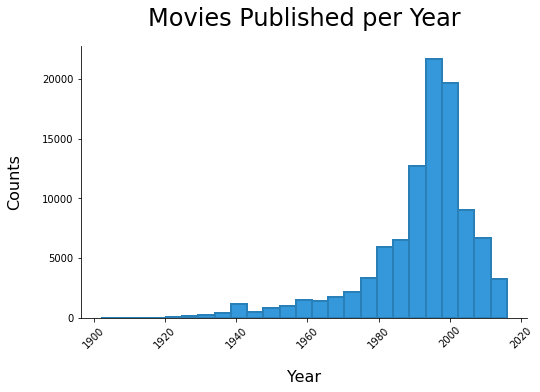

In [18]:
make_histogram(data, 'moviePubYear', title='Movies Published per Year', xlab='Year', ylab='Counts')

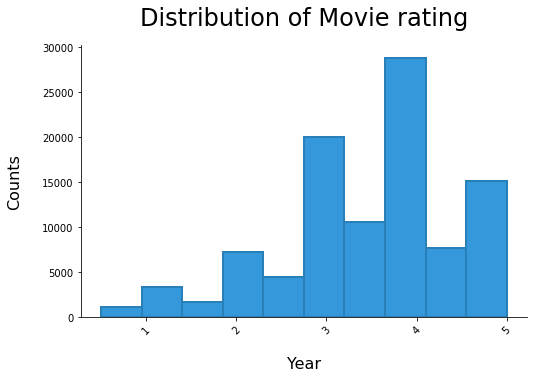

In [19]:
make_histogram(data, 'rating', title='Distribution of Movie rating', xlab='Year', ylab='Counts', bins=10)

## Create Dataframe Genre

In [0]:
genre_df = pd.DataFrame(data['genres'].str.split('|').tolist(), index=data['movieId']).stack()
genre_df = genre_df.reset_index([0, 'movieId'])
genre_df.columns = ['movieId', 'Genre']

In [21]:
genre_df.head()

,movieId,Genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


## Make function Chart for Genre

In [0]:
def make_bar_chart(dataset, attribute, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if sort_index == False:
        xs = dataset[attribute].value_counts().index
        ys = dataset[attribute].value_counts().values
    else:
        xs = dataset[attribute].value_counts().sort_index().index
        ys = dataset[attribute].value_counts().sort_index().values
        
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=40)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.bar(x=xs, height=ys, color=bar_color, edgecolor=edge_color, linewidth=2)
    plt.xticks(rotation=75)

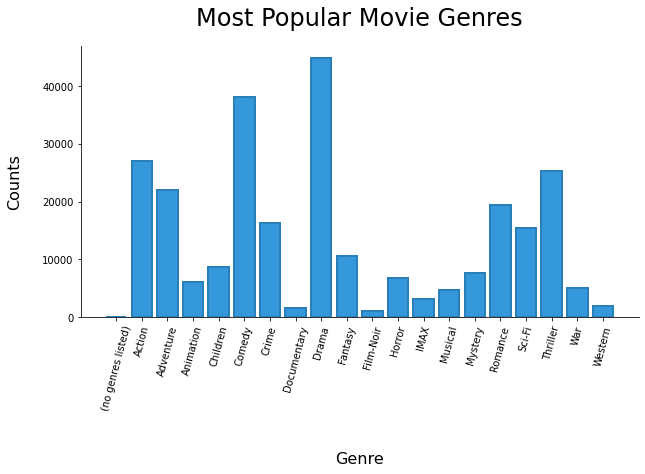

In [23]:
make_bar_chart(genre_df, 'Genre', title='Most Popular Movie Genres', xlab='Genre', ylab='Counts', sort_index=True)

## Calculate Rating by Genre

In [0]:
values = defaultdict(list)
for ind, row in data.iterrows():
    for genre in row['genres'].split('|'):
        values[genre].append(row['rating'])
        
        
genre_lst, rating_lst = [], []
for key, item in values.items():
    if key not in [0, 1]:
        genre_lst.append(key)
        rating_lst.append(np.mean(item))
        
        
genres_with_ratings = pd.DataFrame([genre_lst, rating_lst]).T
genres_with_ratings.columns = ['Genre', 'Mean_Rating']

In [25]:
genres_with_ratings.head()

,Genre,Mean_Rating
0,Adventure,3.52039
1,Animation,3.63606
2,Children,3.46619
3,Comedy,3.44604
4,Fantasy,3.51806


## Make function Chart Genre by Ratings

In [0]:
def make_bar_chart2(dataset, attribute1, attribute2, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
    if sort_index == False:
        xs = dataset[attribute1].value_counts().index
        ys = dataset[attribute2].value_counts().index
    else:
        xs = dataset[attribute1].value_counts().sort_index().index
        ys = dataset[attribute2].value_counts().sort_index().index
        
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=40)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.bar(x=xs, height=ys, color=bar_color, edgecolor=edge_color, linewidth=2)
    plt.xticks(rotation=75)

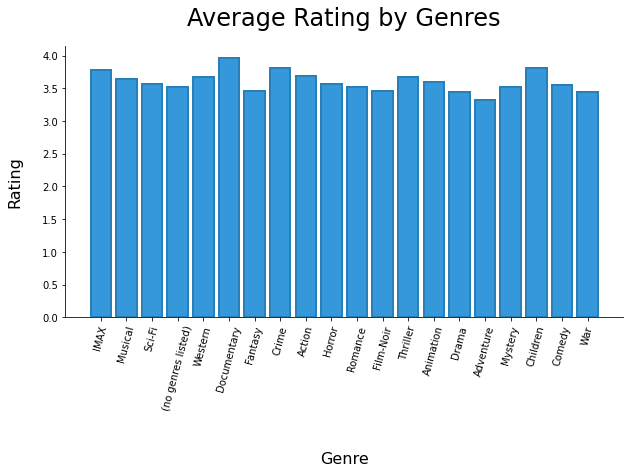

In [27]:
make_bar_chart2(genres_with_ratings, 'Genre','Mean_Rating', title='Average Rating by Genres', xlab='Genre', ylab='Rating', sort_index=False)

In [0]:
num_ratings = pd.DataFrame(data.groupby('movieId').count()['rating']).reset_index()

In [29]:
num_ratings.head()

,movieId,rating
0,1,247
1,2,107
2,3,59
3,4,13
4,5,56


## Merge data Moview & Rating count

In [0]:
data = pd.merge(left=data, right=num_ratings, on='movieId')
data.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)

In [31]:
data.head()

,movieId,title,genres,userId,rating,timestamp,moviePubYear,numRatings
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703,1995,247
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9,4.0,938629179,1995,247
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13,5.0,1331380058,1995,247
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.0,997938310,1995,247
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,855190091,1995,247


In [32]:
# Drop duplicate data movie
data.sort_values(by='numRatings', ascending=False).drop_duplicates('movieId')[:10]

,movieId,title,genres,userId,rating,timestamp,moviePubYear,numRatings
11118,356,Forrest Gump (1994),Comedy|Drama|Romance|War,197,3.0,975428956,1994,341
8901,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,478,5.0,1446621714,1994,324
9756,318,"Shawshank Redemption, The (1994)",Crime|Drama,502,5.0,861304067,1994,311
18228,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,479,5.0,1409004732,1991,304
7619,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,242,5.0,956684986,1977,291
14474,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,279,5.0,838231458,1993,274
51880,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,242,5.0,956684185,1999,259
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,3.0,851866703,1995,247
15689,527,Schindler's List (1993),Drama|War,169,5.0,1234228124,1993,244
17467,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,251,4.0,1476478052,1991,237


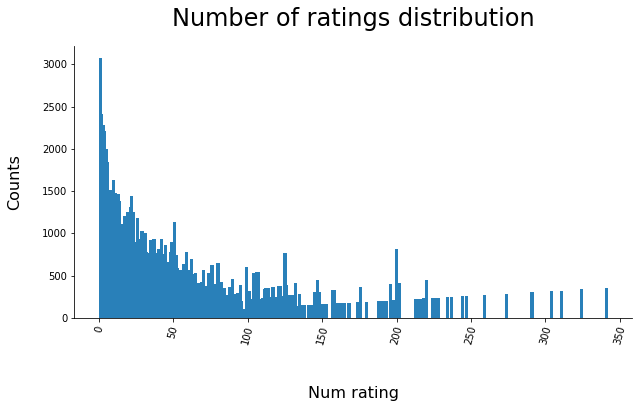

In [33]:
make_bar_chart(data, 'numRatings', title='Number of ratings distribution', xlab='Num rating', ylab='Counts')

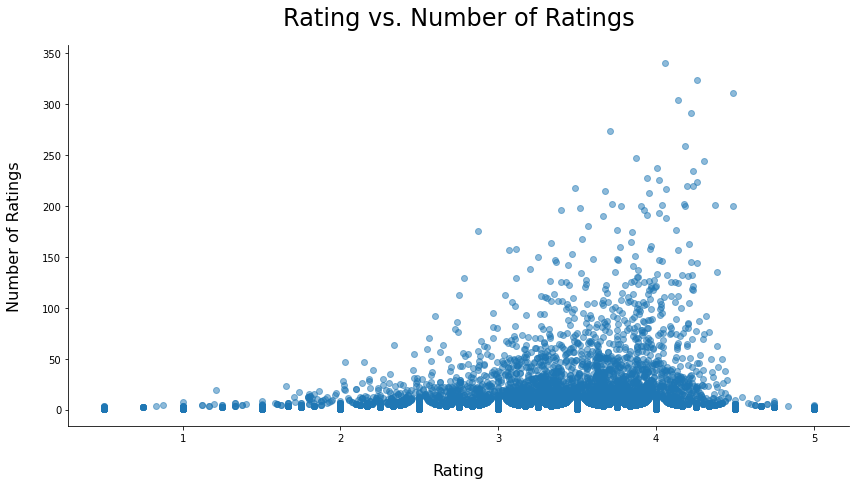

In [34]:
ratings_df = pd.DataFrame()
ratings_df['Mean_Rating'] = data.groupby('title')['rating'].mean().values
ratings_df['Num_Ratings'] = data.groupby('title')['rating'].count().values


fig, ax = plt.subplots(figsize=(14, 7))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('Rating vs. Number of Ratings', fontsize=24, pad=20)
ax.set_xlabel('Rating', fontsize=16, labelpad=20)
ax.set_ylabel('Number of Ratings', fontsize=16, labelpad=20)

plt.scatter(ratings_df['Mean_Rating'], ratings_df['Num_Ratings'], alpha=0.5)

## Content-based RC

### Create Matrix 

In [0]:
matrix = data.pivot_table(
    index='userId',
    columns='title',
    values='rating'
)

In [37]:
matrix.head()

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And God Spoke (1993),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Attitudes (2001),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Rifles (1969),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),"10th Kingdom, The (2000)","11'09""01 - September 11 (2002)",11:14 (2003),12 Angry Men (1957),12 Angry Men (1997),12 Years a Slave (2013),127 Hours (2010),12:08 East of Bucharest (A fost sau n-a fost?) (2006),13 Assassins (Jûsan-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Tzameti (2005),"13th Warrior, The (1999)",...,Zach Galifianakis: Live at the Purple Onion (2006),Zack and Miri Make a Porno (2008),Zardoz (1974),Zathura (2005),Zatoichi on the Road (Zatôichi kenka-tabi) (Zatôichi 5) (1963),Zazie dans le métro (1960),"Zed & Two Noughts, A (1985)",Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zenon: Girl of the 21st Century (1999),Zenon: The Zequel (2001),Zenon: Z3 (2004),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zerophilia (2005),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980),Zombieland (2009),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoot Suit (1981),Zootopia (2016),Zorba the Greek (Alexis Zorbas) (1964),Zorn's Lemma (1970),"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Create function recommendation 

In [0]:
def get_similar_movies(movie_title, n_ratings_filter=100, n_recommendations=5):
    similar = matrix.corrwith(matrix[movie_title])
    corr_similar = pd.DataFrame(similar, columns=['correlation'])
    corr_similar.dropna(inplace=True)
    
    orig = data.copy()
    
    corr_with_movie = pd.merge(
        left=corr_similar, 
        right=orig, 
        on='title')[['title', 'correlation', 'numRatings']].drop_duplicates().reset_index(drop=True)
    
    result = corr_with_movie[corr_with_movie['numRatings'] > n_ratings_filter].sort_values(by='correlation', ascending=False)
    
    return result.head(n_recommendations)

In [39]:
get_similar_movies('Matrix, The (1999)', n_recommendations=11)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,title,correlation,numRatings
2763,"Matrix, The (1999)",1.000000,259
4061,Star Trek: Generations (1994),0.509976,114
2609,"Lord of the Rings: The Two Towers, The (2002)",0.451960,188
2607,"Lord of the Rings: The Fellowship of the Ring,...",0.441993,200
1095,"Dark Knight, The (2008)",0.414997,121
1524,Fight Club (1999),0.387573,202
2866,Mission: Impossible (1996),0.385037,168
2897,"Monsters, Inc. (2001)",0.361754,130
4070,Star Wars: Episode VI - Return of the Jedi (1983),0.359646,217
2178,Inception (2010),0.357930,111
